### Bishoy Sokkar 
### Week 1 Assignment  
### DATA 604


Instructions

1)  Submit a document verifying that you have successfully installed and tested Simio and Python. If you don't have Windows OS, please check the announcement history to find details on how to install Simio on Mac with the Parallel hypervisor. If you don't have Parallel, or use a different OS other than Windows or Mac, please try installing https://www.anylogic.com/



I installed the Simio Software from the Simio website but the license will expire in one month.  

In [1]:
import sys
import simpy
import matplotlib
print(f"Python Version: {sys.version}")
print(f"SimPy Version: {simpy.__version__}")
print("Python and SimPy are installed successfully!")

Python Version: 3.12.11 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 12:58:53) [MSC v.1929 64 bit (AMD64)]
SimPy Version: 4.1.1
Python and SimPy are installed successfully!


2) Make your first modeling and simulation practice using the following article: https://realpython.com/simpy-simulating-with-python/ 


In [2]:
# SimPy Machine Shop Simulation
import random
import simpy
import statistics

# Parameters
RANDOM_SEED = 42
NUM_MACHINES = 2  # Number of machines in the shop
REPAIR_TIME = 30  # Time to repair a machine (minutes)
T_INTERFAIL = 300  # Time between failures (minutes)
SIM_TIME = 7 * 24 * 60  # Simulation time: 1 week (in minutes)
REPAIRPERSONS = [1, 2]  # Scenarios: 1 or 2 repairpersons
MEAN_DOWNTIMES = []  # Store mean downtime for each scenario

# Set random seed for reproducibility
random.seed(2457845)

# Machine class to model machine behavior
class Machine:
    def __init__(self, env, name, repairshop):
        self.env = env
        self.name = name
        self.repairshop = repairshop
        self.parts_made = 0
        self.broken = False
        self.downtime = 0
        self.process = env.process(self.working())
        env.process(self.break_machine())

    def working(self):
        """Machine produces parts until it breaks."""
        while True:
            try:
                while not self.broken:
                    self.parts_made += 1
                    print(f"{self.name} made part {self.parts_made} at time {self.env.now:.2f}")
                    yield self.env.timeout(10)  # Time to make one part
            except simpy.Interrupt:
                self.broken = True
                self.downtime -= self.env.now  # Start tracking downtime
                with self.repairshop.request() as req:
                    yield req
                    yield self.env.timeout(REPAIR_TIME)
                    print(f"{self.name} repaired at time {self.env.now:.2f}")
                self.broken = False
                self.downtime += self.env.now  # End tracking downtime

    def break_machine(self):
        """Machine breaks at random intervals."""
        while True:
            yield self.env.timeout(random.expovariate(1.0 / T_INTERFAIL))
            if not self.broken:
                print(f"{self.name} broke at time {self.env.now:.2f}")
                self.process.interrupt()

# Run simulation for a given number of repairpersons
def run_simulation(num_repairpersons):
    print(f"\n--- Simulation with {num_repairpersons} repairperson(s) ---")
    env = simpy.Environment()
    repairshop = simpy.Resource(env, num_repairpersons)
    machines = [Machine(env, f"Machine {i}", repairshop) for i in range(NUM_MACHINES)]
    env.run(until=SIM_TIME)
    downtimes = [machine.downtime for machine in machines]
    mean_downtime = statistics.mean(downtimes) if downtimes else 0
    print(f"Mean downtime per machine: {mean_downtime:.2f} minutes")
    return mean_downtime

# Run simulations for different numbers of repairpersons
for num in REPAIRPERSONS:
    mean_downtime = run_simulation(num)
    MEAN_DOWNTIMES.append(mean_downtime)



--- Simulation with 1 repairperson(s) ---
Machine 0 made part 1 at time 0.00
Machine 1 made part 1 at time 0.00
Machine 0 made part 2 at time 10.00
Machine 1 made part 2 at time 10.00
Machine 0 made part 3 at time 20.00
Machine 1 made part 3 at time 20.00
Machine 0 made part 4 at time 30.00
Machine 1 made part 4 at time 30.00
Machine 0 made part 5 at time 40.00
Machine 1 made part 5 at time 40.00
Machine 0 made part 6 at time 50.00
Machine 1 made part 6 at time 50.00
Machine 0 made part 7 at time 60.00
Machine 1 made part 7 at time 60.00
Machine 0 made part 8 at time 70.00
Machine 1 made part 8 at time 70.00
Machine 0 made part 9 at time 80.00
Machine 1 made part 9 at time 80.00
Machine 0 made part 10 at time 90.00
Machine 1 made part 10 at time 90.00
Machine 0 made part 11 at time 100.00
Machine 1 made part 11 at time 100.00
Machine 0 made part 12 at time 110.00
Machine 1 made part 12 at time 110.00
Machine 0 made part 13 at time 120.00
Machine 1 made part 13 at time 120.00
Machine 0

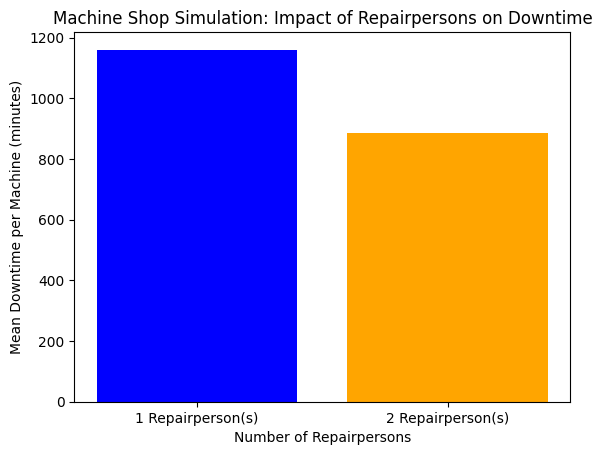

In [4]:
import matplotlib.pyplot as plt

plt.bar([f"{num} Repairperson(s)" for num in REPAIRPERSONS], MEAN_DOWNTIMES, color=['blue', 'orange'])
plt.xlabel("Number of Repairpersons")
plt.ylabel("Mean Downtime per Machine (minutes)")
plt.title("Machine Shop Simulation: Impact of Repairpersons on Downtime")
plt.show()


3) Select one case from https://www.simio.com/academics/student-projects/ and analyze how Simio helped improve the process in the case study.
Selected Case Study: Simulation Report for Vayhan Coffee Limited Production


I chose to discuss How Simio Helped Improve the Process in the Kowloon Bay Transit System Case Study
Stanford University students utilized Simio simulation software to address congestion and passenger mobility issues at the Kowloon Bay transit system, a bustling urban hub in Hong Kong. The primary problem identified was severe congestion at key points, such as the platform escalators at entrances A and B, particularly evident around the 28-minute mark in peak simulations, which led to delays, overcrowding, and diminished passenger experience. Simio played a pivotal role by enabling the creation of a detailed digital model of the station's infrastructure, including passenger flows, escalators, turnstiles, and ticket machines, allowing for virtual analysis without interrupting real operations. Ultimately, Simio improved the process by transforming abstract problems into testable virtual environments, enabling risk-free experimentation that aligned with broader objectives like enhancing passenger experience, ensuring energy efficiency, facilitating quick evacuation, and promoting accessibility for all users.


https://www.simio.com/projects/stanford-university-students-used-simio-simulation-software-to-improve-the-transit-system-at-kowloon-bay/

4)  Write a short essay explaining which other factors could be considered to build a stronger simulation model, and how you can apply simulation and m3odeling in your professional duties.

To build a stronger simulation model for the Kowloon Bay transit system beyond the baseline and alternatives tested, several additional factors could be incorporated. First, introducing stochastic elements, such as random variations in passenger arrival rates, peak-hour surges, or unexpected delays (e.g., modeled with probability distributions like Poisson for arrivals), would better capture real-world unpredictability and improve the model's robustness against variability. We can also Validate the model through comparison with empirical data, such as historical passenger counts or video footage from the station, would enhance accuracy and credibility. 

In my professional duties as an Inbound Operations Leader, I can apply simulation and modeling to streamline workflows and decision-making processes. A significant part of my job involved handling "what-if" scenarios dependent on various factors, such as trailer sizes, the amount of stock, worker availability, and additional resources. My primary responsibility was to calculate and control the flow of work to ensure efficiency and minimize disruptions. For instance, I can envision using a simulation model where work is distributed across different floors, floor sides, or even specific stations, incorporating exact metrics like the processing capacity of each station and the volume of work consumed.
By adding these details into a tool like Simio or Python's SimPy, we could significantly reduce the time spent on manual calculations and eliminate communication gaps through standardization. This would allow us to run dynamic "what-if" scenarios on-the-fly—such as adjusting for sudden increases in inbound volume or staffing shortages—leading to more proactive resource allocation and optimized operations. Ultimately, integrating simulation into my role would not only enhance productivity but also support data-driven strategies that adapt to real-time variables, fostering a more resilient inbound operations environment.